<a href="https://colab.research.google.com/github/jeguns/EP7192/blob/main/Capitulo%201/Unidad_1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de paquetes

In [171]:
!pip install pywaffle > /dev/null 2>&1
!pip install squarify > /dev/null 2>&1

In [181]:
import pandas as pd
import numpy as np
import statistics as stats
from scipy.stats import iqr, variation, skew
import math
import matplotlib.pyplot as plt
from pywaffle import Waffle
import squarify
import seaborn as sns

# Lectura de datos

In [4]:
datos = pd.read_csv('Salud.csv')

In [5]:
datos.head(5)

,Edad,Minutos_ejercicio,IMC,Presion_sistolica
0,31,267,15.9,111
1,42,142,20.1,142
2,61,58,20.2,139
3,41,25,17.8,120
4,40,46,17.4,133


In [6]:
datos.tail(5)

,Edad,Minutos_ejercicio,IMC,Presion_sistolica
95,25,46,20.9,127
96,27,214,19.7,108
97,44,176,20.4,111
98,37,8,20.1,131
99,44,98,15.7,128


# Medidas de tendencia central

## Media

### Ejemplo 1

Interpretar la media aritmética de la edad

In [7]:
datos['Edad'].mean()

np.float64(45.97)

In [10]:
np.mean(datos['Edad'])

np.float64(45.97)

In [11]:
float(datos['Edad'].mean())

45.97

In [12]:
float(np.mean(datos['Edad']))

45.97

In [16]:
stats.mean(datos['Edad'])

45.97

La edad promedio de los pacientes es de 46 años.

### Ejemplo 2

Interpretar la presión sistólica media de los pacientes mayores de 50 años.

In [18]:
 datos.loc[datos['Edad'] > 50].agg(Media=('Presion_sistolica', 'mean'))

,Presion_sistolica
Media,130.452381


In [22]:
(datos
 .loc[datos['Edad'] > 50]
 .agg(Media=('Presion_sistolica', 'mean')))

,Presion_sistolica
Media,130.452381


La presión sistólica promedio de los pacientes mayores de 50 años es de 130 mmHg.

## Mediana

### Ejemplo 3

Interpretar la mediana del IMC

In [23]:
datos['IMC'].median()

19.2

In [24]:
np.median(datos['IMC'])

np.float64(19.2)

In [25]:
float(np.median(datos['IMC']))

19.2

In [27]:
stats.median(datos['IMC'])

19.2

Al menos la mitad de las personas tiene un IMC menor o igual a 19.2.

### Ejemplo 4

Interpretar la mediana de la presión sistólica para las personas que son sedentarias (menos de
30 minutos de ejercicios a la semana) y las que no lo son.

In [28]:
datos = datos.assign(
    Sedentario = np.where(datos["Minutos_ejercicio"] < 30, "Sí", "No"))

In [30]:
datos.groupby("Sedentario", as_index=False).agg(Medianas=("Presion_sistolica", "median"))

,Sedentario,Medianas
0,No,121.0
1,Sí,137.5


In [67]:
(datos
 .groupby("Sedentario", as_index=True)
 .agg(Medianas=("Presion_sistolica", "median")))

,Medianas
Sedentario,
No,121.0
Sí,137.5


Al menos la mitad de las personas sedentarias presenta una presión sistólica de como máximo
137.5 mmHg (¡elevada!). Por otro lado, al menos el 50% de las personas que no son sedentarias
tiene una presión sistólica menor o igual a 121 mmHg (casi en el rango normal).

## Moda

### Ejemplo 5

Interpretar la moda de la presión sistólica

In [38]:
datos["Presion_sistolica"].mode()

,Presion_sistolica
0,121


La presión sistólica más frecuente es de 121 mHg.

### Ejemplo 6

Interpretar la moda de la edad

In [43]:
datos["Edad"].mode()

,Edad
0,36
1,59


Las edades más frecuentes de los pacientes son 36 y 59 años.

### Ejemplo 7

Intepretar la moda del tiempo semanal de ejercicio de los pacientes sedentarios

In [45]:
(datos
 .loc[datos["Sedentario"] == "Sí", "Minutos_ejercicio"]
 .mode())

,Minutos_ejercicio
0,15


El tiempo de ejercicios más frecuente entre los pacientes sedentarios es de 15 minutos.

## Medidas de posición

### Ejemplo 8

Interpretar el percentil 41 de la eda

In [46]:
datos['Edad'].quantile(0.41)

np.float64(42.0)

In [47]:
float(datos['Edad'].quantile(0.41))

42.0

Al menos el 41% de los pacientes tiene 42 años de edad o menos.

### Ejemplo 9

Interpretar los percentiles 12 y 74 de los tiempos semanales de ejercicio de las personas no
sedentarias

In [49]:
(datos
 .loc[datos["Sedentario"] == "No", "Minutos_ejercicio"]
 .quantile([0.12, 0.74]))

,Minutos_ejercicio
0.12,61.44
0.74,240.76


Al menos el 12% de los pacientes no sedentarios realiza como máximo 61.44 minutos de ejercicio
a la semana, mientras que al menos el 74% realiza hasta 240.76 minutos semanales de actividad
física.

### Ejemplo 10

Interpretar los cuartiles del IMC de las personas adultas mayores (60 años a más)

In [51]:
(datos
 .loc[datos["Edad"] > 60, "IMC"]
 .quantile([0.25, 0.50, 0.75]))

,IMC
0.25,19.425
0.50,20.000
0.75,20.925


Al menos el 25% de los pacientes tiene un IMC igual o inferior a 19.425, mientras que como
máximo el 50% tiene un IMC igual o inferior a 20. Además, hasta el 75% de los pacientes
presenta un IMC igual o inferior a 20.925.

### Ejemplo 11

¿Cuál es el tiempo máximo de ejercicio semanal que realiza un paciente joven (menor de 30
años) para estar dentro del 20% que menos ejercicio realiza?

In [52]:
(datos
 .loc[datos["Edad"] < 30, "Minutos_ejercicio"]
 .quantile([0.2]))

,Minutos_ejercicio
0.2,58.0


58 minutos semanales es el tiempo máximo de ejercicio que realiza un paciente joven (menor
de 30 años) para estar dentro del 20% que menos ejercicio realiza.

# Medidas de dispersión

## Rango

### Ejemplo 12

Interpretar el rango de la edad

In [53]:
np.ptp(datos['Edad'])

np.int64(49)

In [56]:
float(np.ptp(datos['Edad']))

49.0

La amplitud de la edad es de 49 años.

### Ejemplo 13

Interpretar el rango del IMC para cada grupo de personas según su nivel de actividad física
(sedentario / no sedentario).

In [66]:
(datos
 .groupby("Sedentario", as_index=True)
 .agg(r=("IMC", lambda x: np.ptp(x))))

,r
Sedentario,
No,9.5
Sí,4.7


La amplitud del IMC de las personas sedentarias es de 4.7 puntos, mientras que para las no
sedentarias es de 9.5 puntos.

## Rango intercuartil

### Ejemplo 14

Interpretar el rango intercuartil de la edad

In [60]:
float(datos["Edad"].quantile(0.75) - datos["Edad"].quantile(0.25))

22.25

In [64]:
float(iqr(datos["Edad"]) )

22.25

La amplitud del 50% central de las edades es de 22.25 años.

### Ejemplo 15

Interpretar el rango intercuartil del IMC para cada grupo de personas según su nivel de
actividad física (sedentario / no sedentario).

In [68]:
(datos
 .groupby("Sedentario", as_index=True)
 .agg(ric=("IMC", lambda x: iqr(x))))

,ric
Sedentario,
No,2.6
Sí,1.7


La amplitud del 50% central de los datos de IMC de las personas sedentarias es de 1.7 puntos,
mientras que para las no sedentarias es de 2.6 puntos.

## Varianza

### Ejemplo 16

Calcular la varianza del tiempo semanal de ejercicios.

In [69]:
datos['Minutos_ejercicio'].var()

8183.117070707067

La varianza del tiempo semanal de ejercicios es de 8183 $minutos^2$

## Desviación estándar

### Ejemplo 17

Interpretar la desviación estándar del tiempo semanal de ejercicios.

In [71]:
datos['Minutos_ejercicio'].std()

90.46058296687606

In [73]:
math.sqrt(datos['Minutos_ejercicio'].var())

90.46058296687606

En promedio, el tiempo semanal de ejercicios se desvía 90.5 minutos respecto su media.

## Coeficiente de variabilidad

### Ejemplo 18

¿Qué variable presenta mayor variabilidad: el IMC o la presión sistólica?

In [78]:
pd.DataFrame({
    "s_imc": [datos["IMC"].std()],
    "s_pres": [datos["Presion_sistolica"].std()],
    "m_imc": [datos["IMC"].mean()],
    "m_pres": [datos["Presion_sistolica"].mean()],
    "cv_imc": [variation(datos["IMC"]) * 100],
    "cv_pres": [variation(datos["Presion_sistolica"]) * 100]})

,s_imc,s_pres,m_imc,m_pres,cv_imc,cv_pres
0,2.033717,12.709799,19.066,123.58,10.613252,10.23312


El IMC presenta mayor variabilidad (cv = 10.61%) que la presión sistólica (cv = 10.23%).

### Ejemplo 19

Los pacientes se dividen en 3 grupos: joven (menor de 30 años),adulto (de 30 a 59 años) y
adulto mayor (de 60 a más años). ¿En qué grupo se observa mayor variabilidad en el tiempo
semanal de ejercicios?

In [85]:
datos = datos.assign(
    Grupo_Edad = pd.cut(
        datos["Edad"],
        bins=[-float("inf"), 30, 60, float("inf")],
        labels=["Joven", "Adulto", "Adulto mayor"],
        right=False  # para que 30 esté incluido en "Adulto"
))
datos.head(5)

,Edad,Minutos_ejercicio,IMC,Presion_sistolica,Sedentario,Grupo_Edad
0,31,267,15.9,111,No,Adulto
1,42,142,20.1,142,No,Adulto
2,61,58,20.2,139,No,Adulto mayor
3,41,25,17.8,120,Sí,Adulto
4,40,46,17.4,133,No,Adulto


In [87]:
(datos
 .groupby("Grupo_Edad", as_index=False)
 .agg(s=("Minutos_ejercicio", "std"),
      m=("Minutos_ejercicio", "mean"),
      cv=("Minutos_ejercicio", lambda x: variation(x)*100))
)

<ipython-input-87-7a066e3c645a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Grupo_Edad", as_index=False)


,Grupo_Edad,s,m,cv
0,Joven,91.755381,156.125000,56.904254
1,Adulto,89.592097,167.046875,53.212251
2,Adulto mayor,84.418070,114.100000,72.112670


El grupo con mayor variabilidad en el tiempo semanal de ejercicios es el de adultos mayores.

# Medidas de asimetría

## Coeficiente de asimetría de Fisher Pearson

### Ejemplo 20

Interpretar el coeficiente de asimetría de Fisher Pearson para cada variable.

In [89]:
datos.select_dtypes(include='number').apply(lambda x: skew(x, nan_policy='omit')).to_frame().T

,Edad,Minutos_ejercicio,IMC,Presion_sistolica
0,-0.13445,-0.17435,-0.317692,0.164644


Las cuatro variables presentan distribuciones que tienden a la simetría, siendo la edad la que
más se acerca a la simetría y el IMC la que más se aleja.

## Coeficiente de asimetría de Bowley

### Ejemplo 21

Interpretar el coeficiente de asimetría de Bowley para cada variable.

In [90]:
def bowley(x):
    q1 = x.quantile(0.25)
    q2 = x.quantile(0.50)
    q3 = x.quantile(0.75)
    return (q3 + q1 - 2 * q2) / (q3 - q1) if (q3 - q1) != 0 else None

datos.select_dtypes(include='number').apply(bowley).to_frame().T

,Edad,Minutos_ejercicio,IMC,Presion_sistolica
0,0.191011,-0.078078,0.019608,0.160494


Las cuatro variables presentan distribuciones que tienden a la simetría en el 50% central de los
datos, siendo el IMC la que más se acerca a la simetría y la edad la que más se aleja. ¿Es una
contradicción respecto a la interpretación con el coeficiente de asimetría de Fisher Pearson?

# Tablas de frecuencia


## Tablas de frecuencia para variables cualitativas

In [131]:
tabla = (
    datos['Sedentario']
    .value_counts(dropna=False)
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Categoría', 'count': 'Frecuencia'}))


tabla['Frecuencia_relativa'] = tabla['Frecuencia'] / tabla['Frecuencia'].sum()

tabla

,Sedentario,Frecuencia,Frecuencia_relativa
0,No,88,0.88
1,Sí,12,0.12


## Tablas de frecuencia para variables cuantitativas discretas




In [137]:
tabla = (
    datos.loc[datos['Edad'] > 60]['Edad']
    .value_counts(dropna=False)
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Valor', 'count': 'Frecuencia'})
)

tabla['Frecuencia_relativa'] = tabla['Frecuencia'] / tabla['Frecuencia'].sum()
tabla['Frecuencia_acumulada'] = tabla['Frecuencia'].cumsum()
tabla['Frecuencia_relativa_acumulada'] = tabla['Frecuencia_relativa'].cumsum()
tabla

,Edad,Frecuencia,Frecuencia_relativa,Frecuencia_acumulada,Frecuencia_relativa_acumulada
0,61,2,0.10,2,0.10
1,62,4,0.20,6,0.30
2,63,3,0.15,9,0.45
3,64,3,0.15,12,0.60
4,65,1,0.05,13,0.65
5,66,3,0.15,16,0.80
6,68,3,0.15,19,0.95
7,69,1,0.05,20,1.00


## Tablas de frecuencia para variables cuantitativas continuas


In [141]:
intervalos = pd.cut(datos['Edad'], bins=5)

tabla = (
    intervalos
    .value_counts(sort=False)
    .reset_index()
    .rename(columns={'index': 'Intervalo', 'count': 'Frecuencia'})
)

tabla['Frecuencia_relativa'] = tabla['Frecuencia'] / tabla['Frecuencia'].sum()
tabla['Frecuencia_acumulada'] = tabla['Frecuencia'].cumsum()
tabla['Frecuencia_relativa_acumulada'] = tabla['Frecuencia_relativa'].cumsum()
tabla

,Edad,Frecuencia,Frecuencia_relativa,Frecuencia_acumulada,Frecuencia_relativa_acumulada
0,"(19.951, 29.8]",16,0.16,16,0.16
1,"(29.8, 39.6]",18,0.18,34,0.34
2,"(39.6, 49.4]",22,0.22,56,0.56
3,"(49.4, 59.2]",24,0.24,80,0.80
4,"(59.2, 69.0]",20,0.20,100,1.00


# Gráficas

## Gráficas para variables cualitativas

### Gráfico de barras

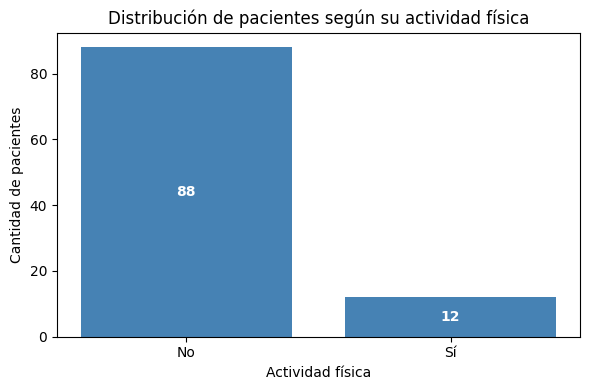

In [144]:
conteo = datos['Sedentario'].value_counts().sort_index().reset_index()
conteo.columns = ['Sedentario', 'n']

fig, ax = plt.subplots(figsize=(6, 4))
barras = ax.bar(conteo['Sedentario'], conteo['n'], color='steelblue')

for i, row in conteo.iterrows():
    ax.text(row['Sedentario'], row['n'] / 2, str(row['n']),
            ha='center', va='center', color='white', fontweight='bold')

ax.set_title("Distribución de pacientes según su actividad física")
ax.set_xlabel("Actividad física")
ax.set_ylabel("Cantidad de pacientes")
plt.tight_layout()
plt.show()

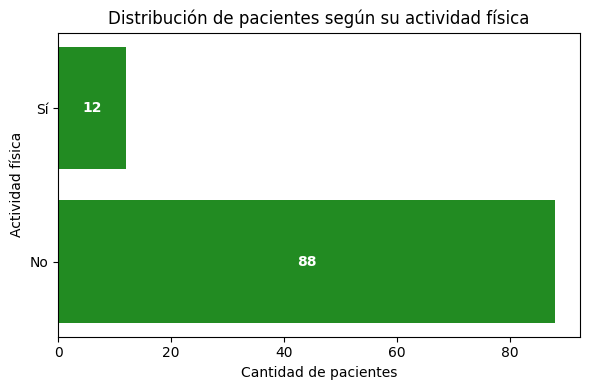

In [145]:
fig, ax = plt.subplots(figsize=(6, 4))
barras = ax.barh(conteo['Sedentario'], conteo['n'], color='forestgreen')

for i, row in conteo.iterrows():
    ax.text(row['n'] / 2, row['Sedentario'], str(row['n']),
            va='center', ha='center', color='white', fontweight='bold')

ax.set_title("Distribución de pacientes según su actividad física")
ax.set_xlabel("Cantidad de pacientes")
ax.set_ylabel("Actividad física")
plt.tight_layout()
plt.show()

### Gráfico circular

In [152]:
conteo = (
    datos['Sedentario']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Sedentario', 'Sedentario': 'n'})
)

conteo['porcentaje'] = round(conteo['count'] / conteo['count'].sum() * 100, 1)
conteo['etiqueta'] = conteo['n'] + ": " + conteo['porcentaje'].astype(str) + "%"
conteo

,n,count,porcentaje,etiqueta
0,No,88,88.0,No: 88.0%
1,Sí,12,12.0,Sí: 12.0%


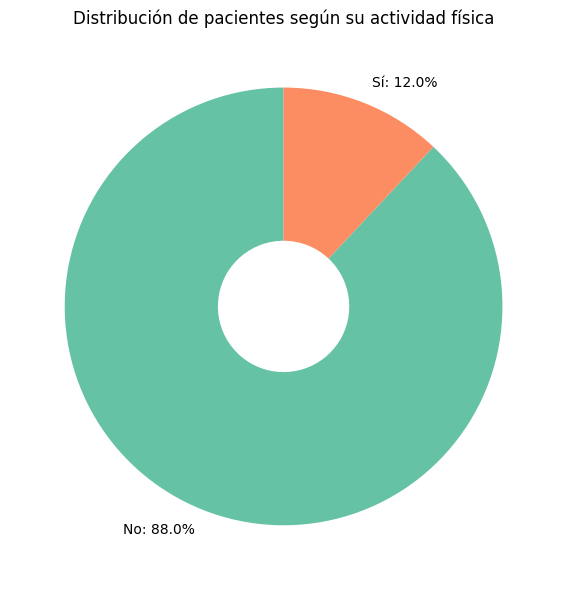

In [153]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    conteo['count'],
    labels=conteo['etiqueta'],
    colors=plt.cm.Set2.colors,  # paleta suave
    startangle=90,
    wedgeprops=dict(width=0.7)  # anillo delgado como `coord_polar`
)

ax.set_title("Distribución de pacientes según su actividad física")
plt.tight_layout()
plt.show()

### Gráfico de waffle

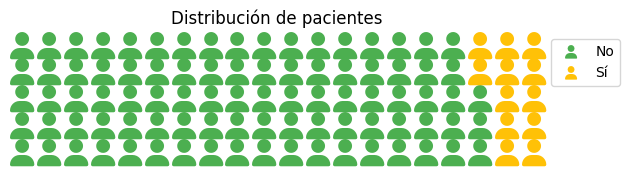

In [165]:
conteo = (
    datos['Sedentario']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Sedentario', 'Sedentario': 'n'})
)
conteo['count'] = round(conteo['count'] / conteo['count'].sum() * 100)
datos_dict = dict(zip(conteo['n'], conteo['count']))
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=datos_dict,
    title={'label': 'Distribución de pacientes', 'loc': 'center'},
    colors=["#4CAF50", "#FFC107"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='user', icon_size=20, icon_legend=True
)

plt.show()

### Gráfico treemap

<Axes: >

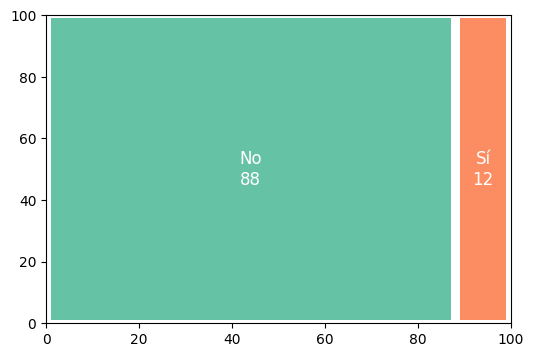

In [173]:
conteo = (
    datos['Sedentario']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Sedentario', 'Sedentario': 'n'})
)

sizes = conteo['count']
labels = conteo['n'] + "\n" + conteo['count'].astype(str)
colors = plt.cm.Set2(range(len(sizes)))  # paleta de colores

plt.figure(figsize=(6, 4))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    text_kwargs={'fontsize':12, 'color':'white'},
    pad=True
)

## Gráficas para variables cuantitativas

### Gráfica de varas (barras)

<ipython-input-178-01d386139512>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


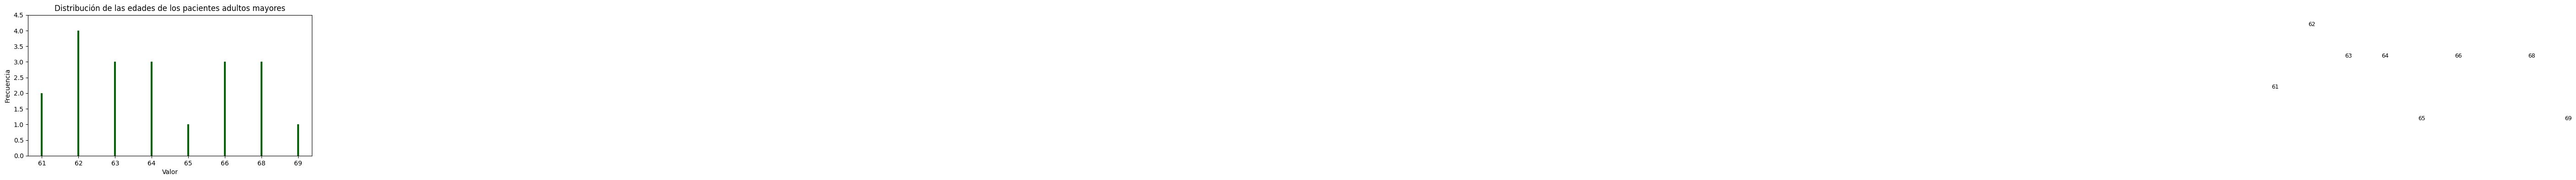

In [178]:
conteo = (
    datos.loc[datos['Edad'] > 60, 'Edad']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Edad', 'Edad': 'n'}))

fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(
    conteo['n'].astype(str),  # convertir a texto para eje x discreto
    conteo['count'],
    color='darkgreen',
    width=0.05)

for i, row in conteo.iterrows():
    ax.text(x=row['n'], y=row['count'] + 0.1, s=str(row['n']),
            ha='center', va='bottom', fontsize=9)

ax.set_ylim(0, 4.5)
ax.set_title("Distribución de las edades de los pacientes adultos mayores")
ax.set_xlabel("Valor")
ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### Histograma

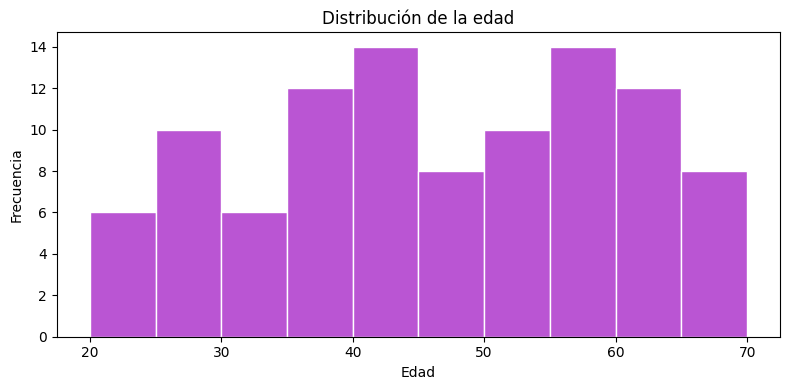

In [180]:
plt.figure(figsize=(8, 4))
plt.hist(datos['Edad'],
         bins=range(int(datos['Edad'].min()), int(datos['Edad'].max()) + 5, 5),
         color='mediumorchid', edgecolor='white')
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

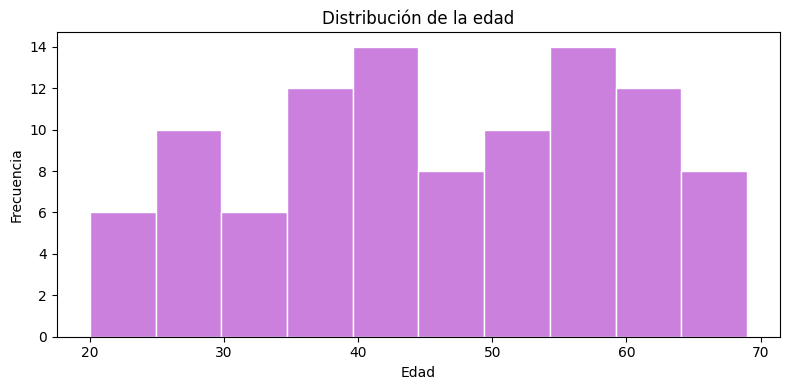

In [182]:
plt.figure(figsize=(8, 4))
sns.histplot(data=datos, x='Edad',
             binwidth=5, color='mediumorchid', edgecolor='white')
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()